In [ ]:
pwd

In [ ]:
arq = open('arq_num.txt', 'w')
for linha in range(1, 101):
    arq.write('%d' % linha + ' - Número' + str(linha) + '\n')
arq.close()

In [ ]:
print(arq)

In [ ]:
!dir

In [ ]:
!type arq_num.txt

In [ ]:
arq_leit = open('arq_num.txt', 'r')
for linha in arq_leit.readlines():
    print(linha)
arq_leit.close()

# 5ª Aula - TETI - Pandas 

In [ ]:
conda list

In [1]:
import pandas as pd

In [ ]:
pwd

In [ ]:
path = 'C:/Users/Davi Souza/OneDrive/Documentos/Jupyter/Datasets/'

In [ ]:
df1 = pd.read_csv(path + 'municipios.csv')

In [ ]:
df1.info()

In [ ]:
df1.describe()

In [ ]:
df1.head()

In [ ]:
df1.tail()

In [ ]:
df1.head(30)

In [ ]:
df2 = pd.read_csv(path + 'municipios_2.csv')

In [ ]:
df2.info()

In [ ]:
df2.head()

In [ ]:
df2 = pd.read_csv(path + 'municipios_2.csv', sep = ';')

In [ ]:
df2.info()

In [ ]:
df2.head()

In [ ]:
df1.shape

In [ ]:
v_linhas, v_colunas = df1.shape

In [ ]:
v_linhas

In [ ]:
v_colunas

In [ ]:
df1.columns

In [ ]:
df1.dtypes

In [ ]:
df1['codigo_ibge'].describe()

In [ ]:
df1.query("nome == 'Manaus'")

In [ ]:
df1.query('codigo_uf == 13')

In [ ]:
df1.query('codigo_uf == 13 and capital == 0')

In [ ]:
df1.query('capital == 1')

# 5ª Aula - TETI - LOC E ILOC

In [ ]:
df1.loc[0:10, ['nome', 'codigo_ibge']]

In [ ]:
df1.loc[2500:2700]

In [ ]:
df1.loc[[2500, 2550, 2600, 2700]]

In [ ]:
df1_ = df1.set_index('nome')

In [ ]:
df1_

In [ ]:
df1_.loc['Manaus']

In [ ]:
df1_.loc[['Manaus', 'Parintins', 'Presidente Figueiredo']]

In [ ]:
df1.loc[df1.latitude > 0]

In [ ]:
df1.loc[df1.capital == 1]

In [ ]:
df1.groupby(by = 'codigo_uf').size()

In [ ]:
df1.iloc[0]

In [ ]:
df1_.iloc[2885]

In [ ]:
df1.iloc[0:10, 0:2]

# 5ª Aula - TETI - Histograma

In [ ]:
!pip install matplotlib

In [ ]:
df1['latitude'].hist()

In [ ]:
df1['longitude'].hist()

# 5ª Aula - TETI - Merge

In [ ]:
df_est = pd.read_csv(path + 'estados.csv')

In [ ]:
df_est.head()

In [ ]:
df1.merge?

In [ ]:
df1.merge(df_est, how = 'inner', on = 'codigo_uf')

# 5ª Aula - TETI - Leitura de HTML

In [ ]:
df_tab = pd.read_html('https://en.wikipedia.org/wiki/Amazonas_(Brazilian_state)')

In [ ]:
df_tab

In [ ]:
print(len(df_tab))

In [ ]:
df_tab1 = pd.read_html('https://en.wikipedia.org/wiki/Amazonas_(Brazilian_state)', match = 'Historical population')

In [ ]:
df_tab1

In [ ]:
df_tab1[0]

In [ ]:
df_tab1 = df_tab1[0]

In [ ]:
df_tab1

In [ ]:
df_tab1 = df_tab1[:12]

In [ ]:
df_tab1

In [ ]:
df_tab1.info()

In [ ]:
df_tab1['Year'].astype('int')

In [ ]:
#Exercício p/ Casa: Fazer uma tabela exibir uma tabela de acordo com a 'df_tab1'

# 5ª Aula - TETI - MySQL

In [2]:
!pip install pymysql

In [3]:
import os
import pymysql

In [6]:
host = os.getenv('MYSQL_HOST')
port = os.getenv('MYSQL_PORT')
user = os.getenv('MYSQL_USER')

password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')

conn = pymysql.connect(
                host = ('10.100.77.72'),
                port = int(3309),
                user = 'usuario',
                passwd = 'IFAM',
                db = 'bd_teste',
                charset = 'utf8mb4')

In [7]:
df = pd.read_sql_query('show tables', conn)
df.head(10)

C:\Users\Aluno\AppData\Local\Temp\ipykernel_8016\1114934367.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('show tables', conn)


,Tables_in_bd_teste
0,bairro
1,cidade
2,cliente
3,clientes_casados
4,clientes_divorciados
5,clientes_solteiros
6,estadocivil
7,filial
8,fornecedor
9,funcionario


In [9]:
df = pd.read_sql_query('select * from cliente', conn)
df.head(10)

C:\Users\Aluno\AppData\Local\Temp\ipykernel_8016\2675148193.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('select * from cliente', conn)


,clicodigo,clisexo,clirendamensal,clinome,clibaicodigo,clifone,cliestcodigo
0,1,M,2100.0,GANDERSON DOS SANTOS,9,,1
1,2,M,3220.0,FRANCISCO DOS SANTOS OLIVEIRA,5,,1
2,4,M,1330.0,CARLOS SOUZA MAGALHAES,1,,1
3,5,F,2030.0,CLEUMA O DIAS,5,,2
4,6,F,2660.0,MARIA R MARTINS,8,,1
5,7,M,5880.0,FRANCISCO M MONTEIRO,11,,1
6,8,M,1918.0,ALIRIO LIMA DA COSTA,9,,3
7,9,F,2800.0,FRANCISCA S CASTRO,3,,1
8,10,M,2002.0,EDMAR F DA SILVA,7,,1
9,11,M,1148.0,ERIVELTON O DA CUNHA,3,,2


In [15]:
df1 = pd.read_sql_query('select * from bairro \
                        inner join cliente \
                        on baicodigo = clibaicodigo \
                        inner join estadocivil \
                        on estcodigo = cliestcodigo', conn)
df1.head(10)

C:\Users\Aluno\AppData\Local\Temp\ipykernel_8016\2238497832.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql_query('select * from bairro \


,baicodigo,bainome,baizoncodigo,baiqtdepessoas,baicidcodigo,clicodigo,clisexo,clirendamensal,clinome,clibaicodigo,clifone,cliestcodigo,estcodigo,estdescricao
0,9,EDUCANDOS,2,47,1,1,M,2100.0,GANDERSON DOS SANTOS,9,,1,1,Solteiro
1,5,PLANALTO,5,55,1,2,M,3220.0,FRANCISCO DOS SANTOS OLIVEIRA,5,,1,1,Solteiro
2,1,CIDADE NOVA,1,55,1,4,M,1330.0,CARLOS SOUZA MAGALHAES,1,,1,1,Solteiro
3,8,JAPIIM,2,46,1,6,F,2660.0,MARIA R MARTINS,8,,1,1,Solteiro
4,11,SAO JOSE,3,47,1,7,M,5880.0,FRANCISCO M MONTEIRO,11,,1,1,Solteiro
5,3,CACHOEIRINHA,2,50,1,9,F,2800.0,FRANCISCA S CASTRO,3,,1,1,Solteiro
6,7,COROADO,3,46,1,10,M,2002.0,EDMAR F DA SILVA,7,,1,1,Solteiro
7,4,ALEIXO,6,49,1,12,F,1540.0,RAFAELA C DOS SANTOS,4,,1,1,Solteiro
8,4,ALEIXO,6,49,1,14,F,5320.0,MARIA DA GLORIA MESQUITA,4,,1,1,Solteiro
9,2,CENTRO,2,49,1,16,F,1064.0,KATRINA S ALBUQUERQUE,2,,1,1,Solteiro


In [17]:
df1.query('bainome == "ALEIXO" & clisexo == "F"')

,baicodigo,bainome,baizoncodigo,baiqtdepessoas,baicidcodigo,clicodigo,clisexo,clirendamensal,clinome,clibaicodigo,clifone,cliestcodigo,estcodigo,estdescricao
7,4,ALEIXO,6,49,1,12,F,1540.0,RAFAELA C DOS SANTOS,4,,1,1,Solteiro
8,4,ALEIXO,6,49,1,14,F,5320.0,MARIA DA GLORIA MESQUITA,4,,1,1,Solteiro
81,4,ALEIXO,6,49,1,123,F,1295.0,ERIKA MALAFAIA MARINHO,4,,1,1,Solteiro
120,4,ALEIXO,6,49,1,178,F,950.6,MARIA DE FATIMA FERREIRA MATOS,4,,1,1,Solteiro
161,4,ALEIXO,6,49,1,233,F,1050.0,SUZANA RIBEIRO LOPES,4,,1,1,Solteiro
238,4,ALEIXO,6,49,1,343,F,1295.0,EDIMEIA DA SILVA PICANCO,4,,1,1,Solteiro
269,4,ALEIXO,6,49,1,387,F,1120.0,ZILENE SILVA SANTOS,4,,1,1,Solteiro
291,4,ALEIXO,6,49,1,420,F,1120.0,TEREZINHA MENDES ROLIM,4,,1,1,Solteiro
314,4,ALEIXO,6,49,1,453,F,756.0,ROSA DE ARAUJO SARAIVA,4,,1,1,Solteiro
323,4,ALEIXO,6,49,1,464,F,756.0,RAIMUNDA BARBOSA NICACIO,4,,1,1,Solteiro


In [18]:
df1.groupby(['bainome', 'clisexo']).size()

bainome       clisexo
ALEIXO        F          22
              M          27
CACHOEIRINHA  F          16
              M          33
              f           1
CENTRO        F          25
              M          24
CIDADE NOVA   F          29
              M          20
COROADO       F          13
              M          33
EDUCANDOS     F          20
              M          28
JAPIIM        F          24
              M          22
PARQUE 10     F          23
              M          24
PLANALTO      F          25
              M          29
PONTA NEGRA   F          22
              M          23
SAO JOSE      F          19
              M          28
dtype: int64

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [24]:
mpl.__version__

'3.7.1'

In [25]:
x0 = [n for n in range(1001)]
y0 = [n + 10 for n in x0]

Text(0.5, 1.0, 'Função de Crescimento Linear')

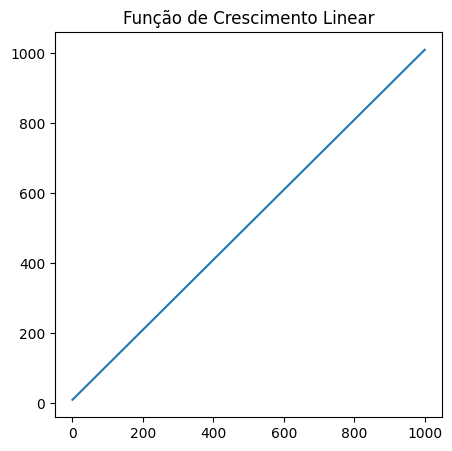

In [41]:
plt.figure(figsize = (5, 5))
plt.plot(x0, y0)
plt.title('Função de Crescimento Linear')

Text(0.5, 1.0, 'Função Quadrática')

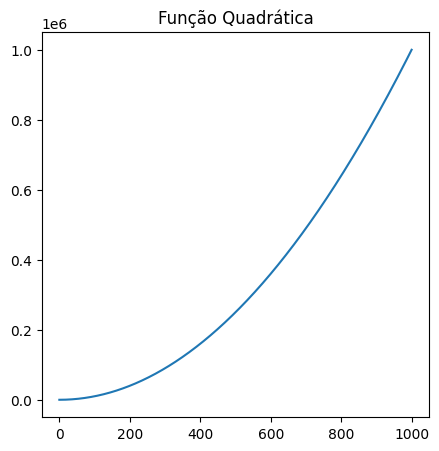

In [42]:
x1 = [n for n in range(1001)]
y1 = [n * n for n in x1]
plt.figure(figsize = (5, 5))
plt.plot(x1, y1)
plt.title('Função Quadrática')

Text(0.5, 1.0, 'Função Cúbica')

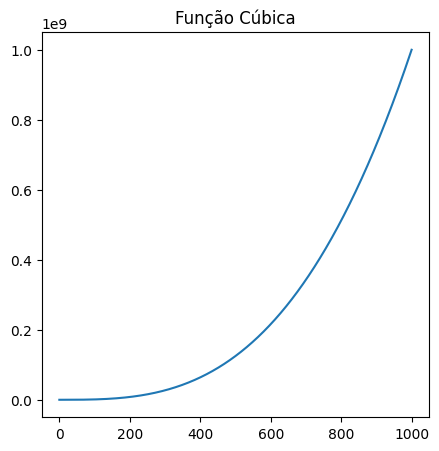

In [43]:
x2 = [n for n in range(1001)]
y2 = [n * n * n for n in x2]
plt.figure(figsize = (5, 5))
plt.plot(x2, y2)
plt.title('Função Cúbica')

Text(0.5, 1.0, 'Função Exponencial')

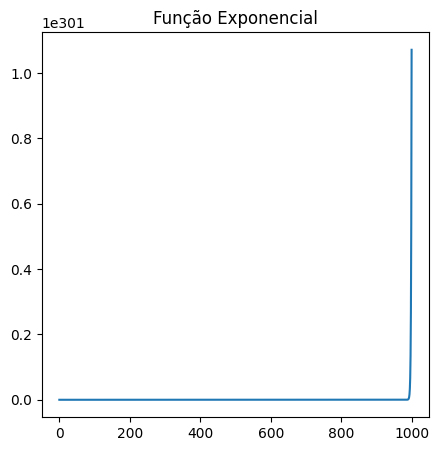

In [44]:
x3 = [n for n in range(1001)]
y3 = [2 ** n for n in x3]
plt.figure(figsize = (5, 5))
plt.plot(x3, y3)
plt.title('Função Exponencial')